(PUNTOSINTERIORES)=

# 4.5 Puntos interiores (PI)

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion_2 -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

```{admonition} Al final de esta nota el y la lectora:
:class: tip

*

```

```{sidebar} Un poco de historia ...

El [método símplex](https://en.wikipedia.org/wiki/Simplex_algorithm) desarrollado por Dantzig en los $40$'s hizo posible que se formularan y analizaran modelos grandes en una forma sistemática y eficiente. Hoy en día continúa siendo uno de los métodos más utilizados para resolver programas lineales. No obstante puede ser ineficiente en problemas lineales "patológicos" (ver [Klee-Minty cube](https://en.wikipedia.org/wiki/Klee%E2%80%93Minty_cube)) pues el tiempo para resolver tales problemas es exponencial respecto al tamaño del problema (medido como el número de variables y la cantidad de almacenamiento para los datos del problema). Para la mayoría de problemas prácticos el método símplex es mucho más eficiente que estos casos "patológicos" pero esto motivó la investigación y desarrollo de nuevos algoritmos con mejor desempeño. En 1984 Karmakar publicó el [algoritmo](https://en.wikipedia.org/wiki/Karmarkar%27s_algorithm) que lleva su mismo nombre que tiene una complejidad polinomial y en la práctica resultó ser eficiente. Pertenece a la clase de métodos con el nombre de [puntos interiores](https://en.wikipedia.org/wiki/Interior-point_method). Hay diferentes tipos de métodos por puntos interiores siendo los de la clase primal-dual ampliamente usados en la práctica. 

```

Los métodos por puntos interiores (PI) son esquemas iterativos para resolver problemas de optimización con restricciones. En un inicio su formulación se utilizó para resolver programas lineales pero se ha extendido su uso al caso no lineal. Por ejemplo, distintos tipos de métodos por PI han sido usados para resolver problemas de optimización convexos.

En cada iteración de los métodos PI las restricciones de desigualdad del problema de optimización se satisfacen de forma estricta. Cada iteración es costosa de calcular y realiza avance significativo a la solución en contraste con el método símplex que requiere un gran número de iteraciones no costosas. No obstante, una propiedad que tienen los métodos PI es que los problemas grandes no requieren muchas más iteraciones que los problemas pequeños a diferencia del método símplex.

En cada iteración el método símplex se mueve de la solución FEV actual a una solución FEV adyacente por una arista de la frontera de la región factible. Los problemas grandes tienen una cantidad enorme de soluciones FEV. Para ver esto piénsese en un PL al que se le van añadiendo restricciones funcionales. Entonces se añadirán aristas y por tanto soluciones FEV.  Los métodos PI evitan tal comportamiento pues avanzan por el interior de la región factible hacia los puntos óptimos y tiene muy poco efecto el ir añadiedo restricciones funcionales al PL para el desempeño de los métodos PI.

```{admonition} Comentario

Los métodos PI pueden manejar un número grande de variables y restricciones, por ejemplo mayor a $10^6$. Además son métodos que pueden implementarse para procesamiento con cómputo en paralelo.

```

Conforme se avanza en las interaciones en los métodos PI se aproxima a los puntos óptimos en una bola abierta. Por ejemplo, para el {ref}`ejemplo prototipo <EJPROTOTIPO>` de un programa lineal se presenta una trayectoria obtenida por un método PI que se acerca a la solución óptima $(2, 6)$:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

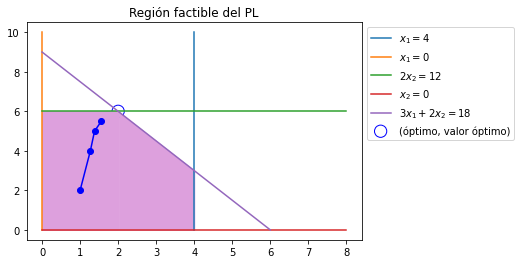

In [9]:
#x_1 ≤ 4

point1_x_1 = (4,0)

point2_x_1 = (4, 10)

point1_point2_x_1 = np.row_stack((point1_x_1, point2_x_1))

#x_1 ≥ 0
point3_x_1 = (0,0)

point4_x_1 = (0, 10)

point3_point4_x_1 = np.row_stack((point3_x_1, point4_x_1))

#2x_2 ≤ 12 or x_2 ≤ 6

point1_x_2 = (0, 6)

point2_x_2 = (8, 6)

point1_point2_x_2 = np.row_stack((point1_x_2, point2_x_2))

#x_2 ≥ 0

point3_x_2 = (0, 0)

point4_x_2 = (8, 0)

point3_point4_x_2 = np.row_stack((point3_x_2, point4_x_2))

#3x_1 + 2x_2 ≤ 18

x_1_region_1 = np.linspace(0,4, 100)

x_2_region_1 = 1/2*(18 - 3*x_1_region_1)


x_1 = np.linspace(0,6, 100)

x_2 = 1/2*(18 - 3*x_1)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)

optimal_point = (2, 6)

plt.scatter(optimal_point[0], optimal_point[1], marker='o', s=150,
            facecolors='none', edgecolors='b')

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$", "(óptimo, valor óptimo)"], bbox_to_anchor=(1, 1))

point_1_interior_points = (1, 2)
point_2_interior_points = (1.27, 4)
point_3_interior_points = (1.38, 5)
point_4_interior_points = (1.56, 5.5)

points_interior_points = np.row_stack((point_1_interior_points,
                                       point_2_interior_points,
                                       point_3_interior_points,
                                       point_4_interior_points))

plt.plot(points_interior_points[:, 0], points_interior_points[:, 1], 
         marker='o', color="blue"
         )

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
x_1_region_2 = np.linspace(0,2, 100)
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")
plt.show()


Aunque los métodos PI son una buena alternativa para resolver PL's perdemos ventajas que tiene el método símplex como es el análisis de sensibilidad y análisis posterior que se realiza al resolver el PL al modificar sus parámetros. Ver las referencias al final de la nota para tales análisis.

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

2. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.

3. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.
